# Cat and Mouse - Hide and Seek (MDP's, Strategy)

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
# Import the MarkovChain class from markovchain.py
from markovchains import MarkovChain

N = 7

## Transition Matrix of Position of the Mouse
$M_{ij} = Prob(i,j)$ Probability of Mouse going to hole $j$ from hole $i$

Transition Matrix
$$
  M_{7\times7} =
  \left[ {\begin{array}{ccccc}
    0 & 1 &   &   &   &   &   \\
    ½ & 0 & ½ &   &   &   &   \\
      & ½ & 0 & ½ &   &   &   \\
      &   & ½ & 0 & ½ &   &   \\
      &   &   & ½ & 0 & ½ &   \\
      &   &   &   & ½ & 0 & ½ \\
      &   &   &   &   & 1 & 0 \\
  \end{array} } \right]
$$

[[0.  1.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  1.  0. ]]


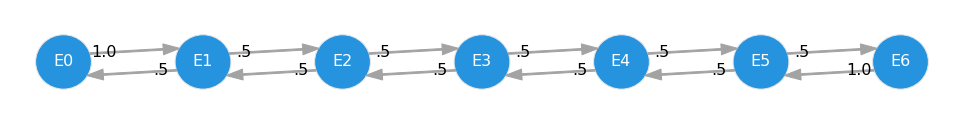

In [2]:
# Transition matrix
M = 1/2*np.array([
    [0, 2, 0, 0, 0, 0, 0], # rows...
    [1, 0, 1, 0, 0, 0, 0], 
    [0, 1, 0, 1, 0, 0, 0], 
    [0, 0, 1, 0, 1, 0, 0], 
    [0, 0, 0, 1, 0, 1, 0], 
    [0, 0, 0, 0, 1, 0, 1], 
    [0, 0, 0, 0, 0, 2, 0], 
])
    
print(M)    
mc = MarkovChain(M, ['E'+str(i) for i in range(N)])
mc.build_network(pos='linear')
mc.draw()

## Update of probabilities
$P_{ji} = Prob(j|\lnot i)$ Probability of Mouse in hole $j$ if not found previously in hole $i$

In [3]:
np.set_printoptions(precision = 3)
P = np.zeros((N,N))

for prev in range(N):
    X = np.ones(N)
    X[prev]=0
    # print(M.T*X)
    # print(np.sum(1/(N-1)*M.T*X, axis = 1))
    # print(np.dot(1/(N-1)*M.T*X,X))
    R = np.sum(1/(N-1)*M.T*X, axis = 1)
    # print(R)
    P[prev] = R
P=P.T    
print(P)

def matrix2latex(m, fmt=None):
    latex = r'\begin{bmatrix}'
    sc = ''
    for row in m:
        latex += sc
        sr = ''
        for col in row:
            latex += sr + (str(col) if fmt is None else fmt.format(col)) + ' '
            sr = r'&'
        sc = r'\\'
    latex += r'\end{bmatrix}'
    return latex

expr = r'P_{7\times7} = \frac{1}{12}·'+matrix2latex(P*12,'{:.0f}')
# expr += r'\end{equation}' # optional, but convenient

from IPython.display import display, Math, Latex
display(Math(expr))

[[0.083 0.    0.083 0.083 0.083 0.083 0.083]
 [0.083 0.25  0.167 0.25  0.25  0.25  0.25 ]
 [0.167 0.083 0.167 0.083 0.167 0.167 0.167]
 [0.167 0.167 0.083 0.167 0.083 0.167 0.167]
 [0.167 0.167 0.167 0.083 0.167 0.083 0.167]
 [0.25  0.25  0.25  0.25  0.167 0.25  0.083]
 [0.083 0.083 0.083 0.083 0.083 0.    0.083]]


<IPython.core.display.Math object>

In [4]:
#For example if we were in state CAT[hole=1,NoMouse] = E[1]
prev = 1
left = prev - 1
stay = prev
right = prev + 1
print(f'P[Stay,E[{prev}]] =',P[stay,prev])
print(f'P[Left,E[{prev}]] =',P[left,prev])
print(f'P[Right,E[{prev}]] =',P[right,prev])

P[Stay,E[1]] = 0.25
P[Left,E[1]] = 0.0
P[Right,E[1]] = 0.08333333333333333


With this matrix, we could construct the state Markov-Decision tree...

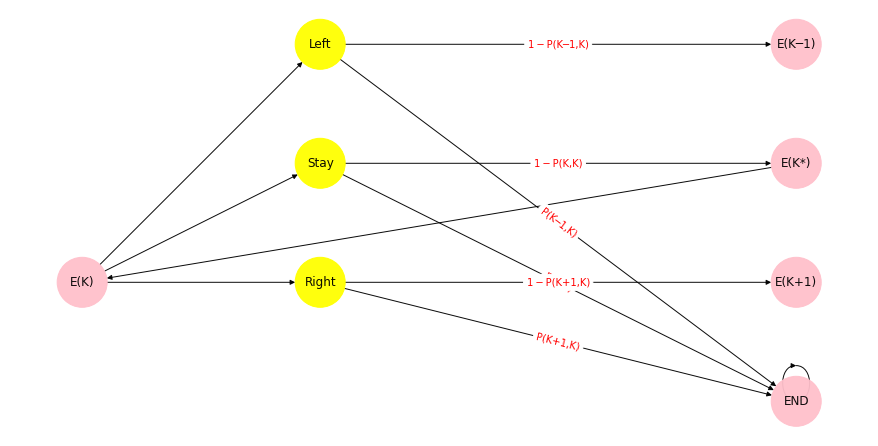

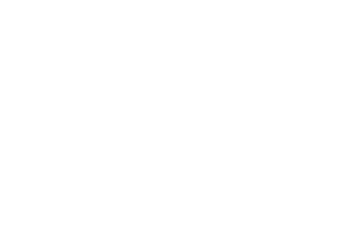

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

k = 'K'
edges = [(f'E({k})','Left'), (f'E({k})','Stay'), (f'E({k})','Right'),
         ('Left','END'), ('Left',f'E({k}─1)'),
         ('Stay','END'), ('Stay',f'E({k}*)'),
         ('Right','END'), ('Right',f'E({k}+1)'),
         (f'E({k}*)',f'E({k})'),
         ('END','END')
        ]

G = nx.DiGraph()
G.add_edges_from(edges)

layout = {}
layout[f'E({k})']=[-1.0,-0.5]
layout[f'Left']=[.0,0.5]
layout[f'Stay']=[.0,0.]
layout[f'Right']=[.0,-0.5]
layout[f'END']=[+2.0,-1.0]
layout[f'E({k}─1)']=[+2.0,0.5]
layout[f'E({k}*)' ]=[+2.0,0]
layout[f'E({k}+1)']=[+2.0,-0.5]

color_map = []
for node in G:
    if node in ['Left','Stay','Right']:
        color_map.append('yellow')
    else: 
        color_map.append('pink')      
        
plt.figure(figsize=(12,6))
nx.draw(
    G, layout, edge_color='black', width=1, linewidths=1,
    node_size=2500, # node_color='pink', alpha=0.9,
    node_color = color_map, alpha=0.95, # with_labels=True
    labels={node: node for node in G.nodes()}
)
edge_labels = {
         ('Left','END'): f'P({k}─1,{k})', ('Left',f'E({k}─1)'): f'1 ─ P({k}─1,{k})',
         ('Stay','END'): f'P({k},{k})'  , ('Stay',f'E({k}*)'):   f'1 ─ P({k},{k})',
         ('Right','END'):f'P({k}+1,{k})', ('Right',f'E({k}+1)'):f'1 ─ P({k}+1,{k})',
    }
nx.draw_networkx_edge_labels(
    G, layout,
    edge_labels = edge_labels,
    font_color='red'
)
# nx.draw_networkx_edges(G, layout, connectionstyle='arc3, rad = 0.1', width = 2, arrows=True, label=edge_labels)

"""
# As an alternative, if you prefer you can render the graph using GraphViz...
G.graph['edge'] = {'arrowsize': '0.6', 'splines': 'curved'}
G.graph['graph'] = {'scale': '3'}
G['END']['END']['arrowsize']='0.6'
G['END']['END']['splines']='curved'
G['END']['END']['color']='red'
G['END']['END']['scale']=300
print(G['END']['END'])

A = to_agraph(G) 
A.layout('dot') # prog=neato|dot|twopi|circo|fdp|nop                                                                
# A.draw('multi.png')   
# For Jupyterlab,  print the graph inline to the same browser session with IPython.display.Image 
    
from IPython.display import Image
Image(A.draw(format='png'))
"""
plt.axis('off')
plt.show()

From this, we could construct iteratively the full Markov-Decision tree...

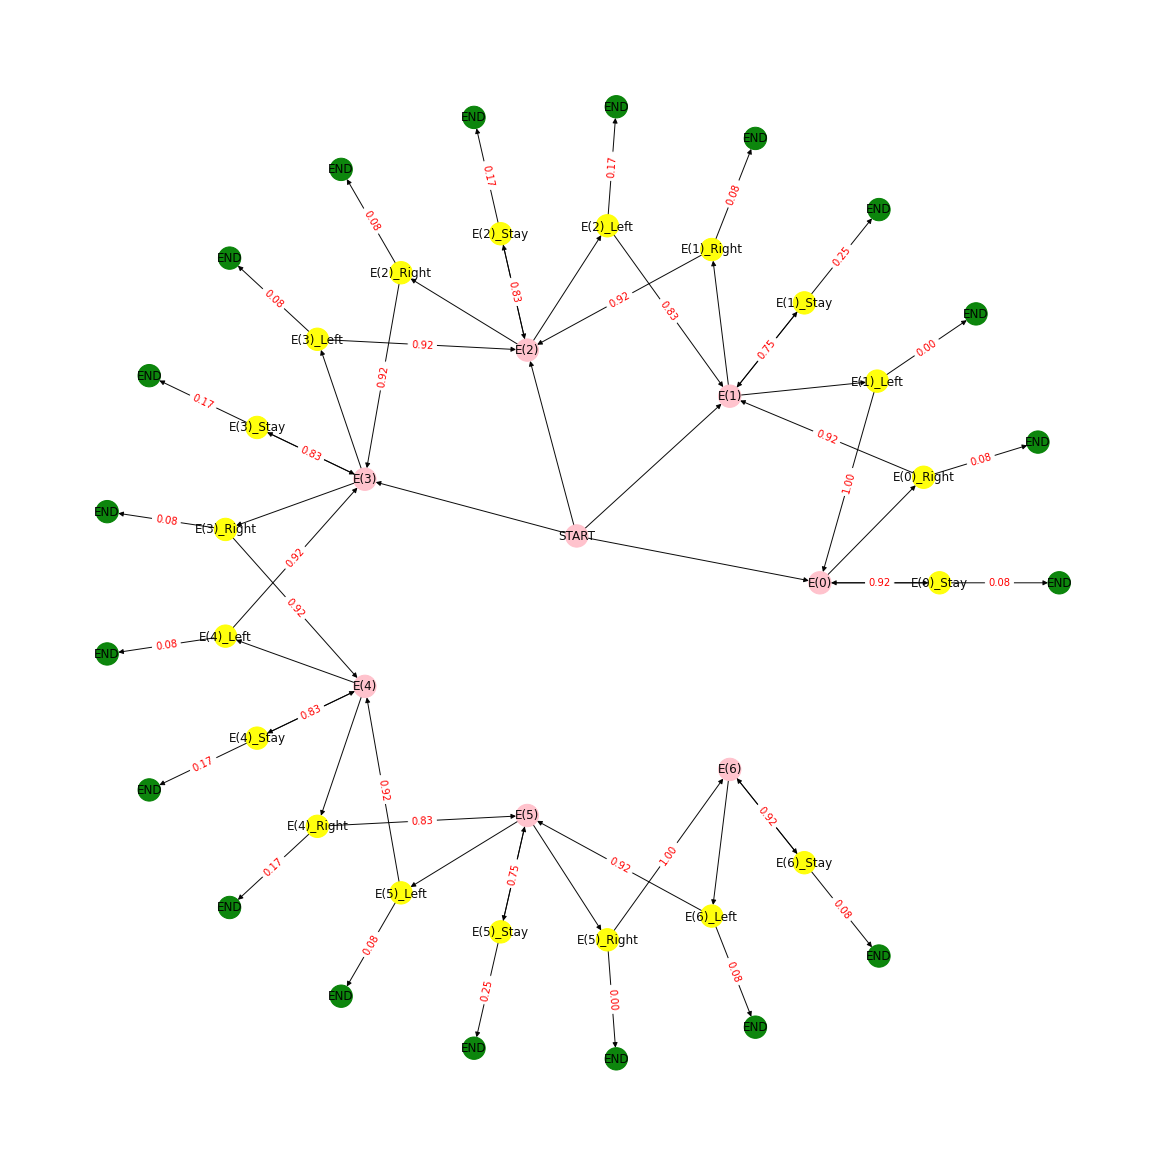

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
import math
actions = ['Left','Stay','Right']

G = nx.DiGraph()
G.add_node('START')

for k in range(N):
    G.add_node(f'E({k})',weight=0.4, size=10, hole=k, action=None, result=None)

for k in range(N):
    if k<= N//2: # because of the symmetry properties of the problem
        G.add_edge('START',f'E({k})')
    for a in [-1,0,+1]:
        if k+a>-1 and k+a<N:
            G.add_node(f'E({k})_'+actions[a+1],weight=0.4, size=5, hole=k,action=a,result=None)
            G.add_edge(f'E({k})',f'E({k})_'+actions[a+1])
            for r in [True,False]:
                if r:
                    G.add_node(f'E({k})_'+actions[a+1]+'_END',weight=0.4, size=5, hole=k,action=a,result=r)
                    G.add_edge(f'E({k})_'+actions[a+1],f'E({k})_'+actions[a+1]+'_END')
                else:    
                    G.add_edge(f'E({k})_'+actions[a+1],f'E({k+a})')

layout = nx.spring_layout(G)
for node in G.nodes():
    if node == 'START': continue
    hole=G.nodes[node]['hole']
    if G.nodes[node]['action'] is None:
        alpha=2*math.pi/N*hole
        radius=0.5
        layout[node]=[radius*math.cos(alpha),radius*math.sin(alpha)]
    elif G.nodes[node]['result'] is None:
        action=G.nodes[node]['action']
        alpha=2*math.pi/(3*N)*(3*hole+action)
        radius=0.75
        layout[node]=[radius*math.cos(alpha),radius*math.sin(alpha)]
    else:
        action=G.nodes[node]['action']
        result=G.nodes[node]['result']
        alpha=2*math.pi/(6*N)*(2*(3*hole+action)+0*(+1/2 if result else -1/2))
        radius=1.00
        layout[node]=[radius*math.cos(alpha),radius*math.sin(alpha)]

color_map = []
node_labels = {}
for node in G:
    if '_END' in node:
        color_map.append('green')
        node_labels[node]='END'
    elif '_' in node: # action
        color_map.append('yellow')
        node_labels[node]=node[node.index(''):]
    else: 
        color_map.append('pink')  
        node_labels[node]=node
        
plt.figure(figsize=(16,16))
nx.draw(
    G, layout, edge_color='black', width=1, linewidths=1,
    node_size=500, # node_color='pink', alpha=0.9,
    node_color = color_map, alpha=0.95, # with_labels=True
    labels=node_labels
)

edge_labels = {}
for edge in G.edges():
    if '_' in edge[0]:
        hole = G.nodes[edge[0]]['hole']
        action=G.nodes[edge[0]]['action']
        prob=P[hole+action,hole]
        if '_END' in edge[1]:
            edge_labels[edge]=f'{prob:.2f}'
        else:    
            edge_labels[edge]=f'{1-prob:.2f}'
    
nx.draw_networkx_edge_labels(
    G, layout,
    edge_labels = edge_labels,
    font_color='red'
)

plt.axis('off')
plt.show()